<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/M08-deep-learning/AT%26T_logo_2016.svg" alt="AT&T LOGO" width="50%" />

# Orange SPAM detector

## Company's Description 📇

AT&T Inc. is an American multinational telecommunications holding company headquartered at Whitacre Tower in Downtown Dallas, Texas. It is the world's largest telecommunications company by revenue and the third largest provider of mobile telephone services in the U.S. As of 2022, AT&T was ranked 13th on the Fortune 500 rankings of the largest United States corporations, with revenues of $168.8 billion! 😮

## Project 🚧

One of the main pain point that AT&T users are facing is constant exposure to SPAM messages.

AT&T has been able to manually flag spam messages for a time, but they are looking for an automated way of detecting spams to protect their users.

## Goals 🎯

Your goal is to build a spam detector, that can automatically flag spams as they come based solely on the sms' content.

## Scope of this project 🖼️

To start off, AT&T would like you to use the following dataset:

[Dowload the Dataset](https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv)

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you:

### Start simple
A good deep learing model does not necessarily have to be super complicated!

### Transfer learning
You do not have access to a whole lot of data, perhaps channeling the power of a more sophisticated model trained on billions of observations might help!

## Deliverable 📬

To complete this project, your team should:

* Write a notebook that runs preprocessing and trains one or more deep learning models in order to predict the spam or ham nature of the sms
* State the achieved performance clearly

# 1. EDA

We will begin with importing our dataset and exploring it

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing pandas and  numpy to manipulate dataframe and arrays objects
import pandas as pd
import numpy as np

# Importing visualization libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

In [ ]:
# Installing and importing wordcloud package
!pip install --upgrade wordcloud
from wordcloud import WordCloud
!pip uninstall Pillow
!pip install Pillow==9.4.0

# Importing text preprocessing libraries
import string
!python -m spacy download en_core_web_sm -q
import en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

Found existing installation: Pillow 9.4.0
Uninstalling Pillow-9.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PIL/*
    /usr/local/lib/python3.10/dist-packages/Pillow-9.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlicommon-92722cb2.so.1
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libbrotlidec-db4b3db6.so.1.0.9
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libfreetype-9ff7e0a7.so.6.18.3
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libharfbuzz-ceb38b77.so.0.60000.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libjpeg-16b2c4cf.so.62.3.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblcms2-023fe64a.so.2.0.14
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/liblzma-160b9c62.so.5.4.0
    /usr/local/lib/python3.10/dist-packages/Pillow.libs/libopenjp2-78c47f58.so.2.5.0
    /usr/local/lib/python3.10/d

2023-08-07 18:26:05.388725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 18:26:06.867936: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Importing sklearn train-test-split
from sklearn.model_selection import train_test_split

In [ ]:
# Importing tensorflow and keras classes to build neural networks
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, LSTM, Dropout, Activation, Bidirectional
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2.12.0


In [ ]:
df = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Deep+Learning/project/spam.csv", encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We have a dataframe with :


*   5572 entries / rows

*   5 columns
*   The first 2 columns seems to represent respectively our label (v1 : ham or spam), and the content of the e-mail (v2)


*   The last 3 columns however, seem to contain mostly null values and will probably not be of much use for our model : we will check their content and possibly drop them




In [ ]:
df["Unnamed: 2"].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [ ]:
df["Unnamed: 3"].value_counts()

 MK17 92H. 450Ppw 16"                         2
GE                                            2
 why to miss them                             1
U NO THECD ISV.IMPORTANT TOME 4 2MORO\""      1
i wil tolerat.bcs ur my someone..... But      1
 ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""    1
whoever is the KING\"!... Gud nyt"            1
 TX 4 FONIN HON                               1
 \"OH No! COMPETITION\". Who knew             1
IåÕL CALL U\""                                1
Name: Unnamed: 3, dtype: int64

In [ ]:
df["Unnamed: 4"].value_counts()

GNT:-)"                                                     2
 just Keep-in-touch\" gdeve.."                              1
 Never comfort me with a lie\" gud ni8 and sweet dreams"    1
 CALL 2MWEN IM BK FRMCLOUD 9! J X\""                        1
 one day these two will become FREINDS FOREVER!"            1
Name: Unnamed: 4, dtype: int64

These columns' non null values are strings that are mostly unique. Since there are so many missing values, these are not informations that are relevant to use when building our model.

We'll also check for duplicates in our dataset and remove them.

In [ ]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
# We have 403 duplicate rows
df = df.drop_duplicates()

We'll rename our columns for a better general understanding, and encode our label into a binary target

In [ ]:
df = df.rename(columns = {"v1" : "label", "v2" : "content"})
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df["target"] = df["label"].apply(lambda x : 0 if x == "ham" else 1)
df.head()

,label,content,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df["label"].value_counts().to_list() == df["target"].value_counts().to_list()

True

We need to observe the distribution of our data : if we have a very imbalanced proportion of each category, this might affect the performances of our model.

In [ ]:
df.label.value_counts(normalize = True)

ham     0.87367
spam    0.12633
Name: label, dtype: float64

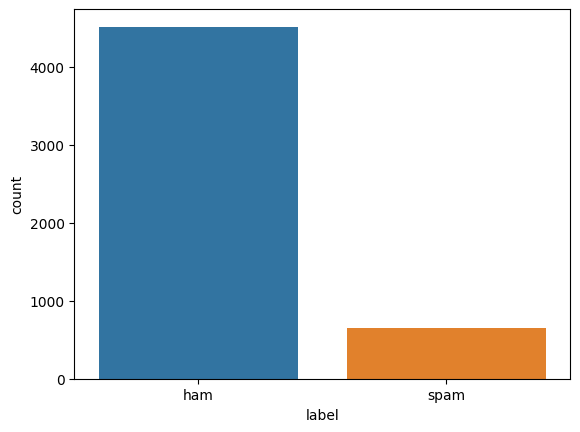

In [ ]:
sns.countplot(data = df, x = 'label')
plt.show()

This shows how imbalanced our data is : we have a lot less spam than legit mail in the dataset.

This means 2 things for us :    


*   First, it will be absolutely necessary to stratify our train-test-split
*   Second, if our model has an accuracy of approximately 0.88, this might not mean that it performs well but rather that is always predicts a mail as ham, and therefore never detects spam!

If our model performance in the end is not great, we might need to resample our dataset to have balanced proportions of each target.



One useful visualization for NLP is wordclouds : let's produce wordclouds for both our targets and see if something stands out.

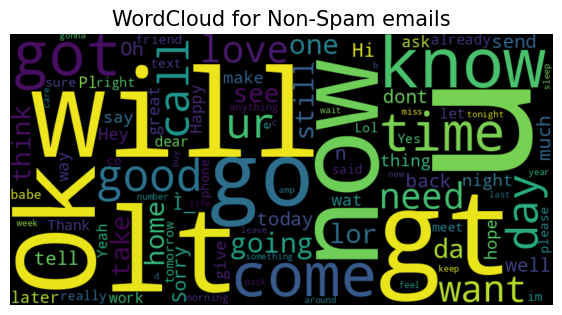

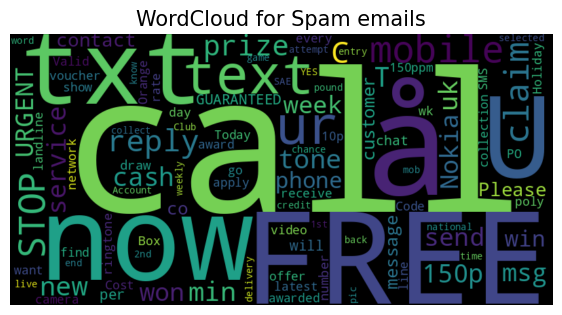

In [ ]:
def plot_word_cloud(data, label):
    email_corpus = " ".join(data['content'])

    plt.figure(figsize=(7, 7))

    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations = False).generate(email_corpus)

    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {label} emails', fontsize=15)
    plt.axis('off')
    plt.show()

plot_word_cloud(df[df["label"] == "ham"], 'Non-Spam')
plot_word_cloud(df[df["label"] == "spam"], 'Spam')

That's a pretty interesting (and expected) result : spam mails tend to contain high frequencies of words such as "free", "claim, "prize", "win", "urgent", that are typical clickbaits.

# 2. Text preprocessing

Before training a Deep Learning model on our data, we need to transform our raw text into a clean and tokenized format.

We will :
- remove all punctuation or special characters and keep only alphanumerical characters, single whitespaces and apostrophes
- put everything in lower case and remove excess whitespaces at the beginning or end of each text
- remove stop words
- replace each word with it's lemmatized token

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
df["clean_content"] = df["content"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch == " " or ch == "'"))
df["clean_content"] = df["clean_content"].apply(lambda x : x.replace(" +", " ").lower().strip())
df["clean_content"] = df["clean_content"].apply(lambda x : " ".join([token.lemma_ for token in nlp(x) if (token.text not in STOP_WORDS) & (token.lemma_ not in STOP_WORDS)]))
df

NameError: ignored

In [ ]:
# Checking all of our "clean_content" column is indeed in string format
df["clean_content"].apply(lambda x : type(x) == str).value_counts()

True    5169
Name: clean_content, dtype: int64

We now have completed the preprocessing of each message's content.

Sometimes the preprocessing removes all the words in a string (because they contain only stopwords for example) so we'll filter out those observations.

In [ ]:
df["len_review"] = df["clean_content"].apply(lambda x: len(x))
df = df[df["len_review"]!=0]
df = df.drop("len_review", axis = 1)
df.shape

(5151, 4)

# 3. Train test split, tokenizing and building tensorflow datasets

We'll split our data into train set (60%), validation set (20%), and test set (20%). And since our data is imbalanced, we'll stratify to preserve the proportions of each class of our target.

In [ ]:
X_train, X_rest, Y_train, Y_rest = train_test_split(df["clean_content"], df["target"], test_size = 0.4, stratify = df["target"], random_state = 42) #train set is 60%
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, stratify = Y_rest, random_state = 42) #splitting the remaining 40% in half to get 20% in val set and 20% in test set
# random_state ensures reproductibility
print("X_train", X_train.shape, "Y_train", Y_train.shape)
print("X_val", X_val.shape, "Y_val", Y_val.shape)
print("X_test", X_test.shape, "Y_test", Y_test.shape)

X_train (3090,) Y_train (3090,)
X_val (1030,) Y_val (1030,)
X_test (1031,) Y_test (1031,)


We will now instanciate a tokenizer and encode our texts : we will fit on the train set, and then transform all texts.

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token = "out_of_vocab") # For now we'll only keep the 1000 most common words, we might change this later and see how it affects performance

In [ ]:
tokenizer.fit_on_texts(X_train)

X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_val_encoded = tokenizer.texts_to_sequences(X_val)
X_test_encoded = tokenizer.texts_to_sequences(X_test)

In order to build an tensorflow dataset that can be used to train our deep learning model, we need to convert our encoded texts to numpy arrays of a unique size. In order to attain this, we'll use padding.

In [ ]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, padding="post")
val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val_encoded, padding="post")
test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_encoded, padding="post")

We are now able to build three tensor slice datasets using the training, validation and test data.

In [ ]:
train = tf.data.Dataset.from_tensor_slices((train_padded, Y_train))
val = tf.data.Dataset.from_tensor_slices((val_padded, Y_val))
test = tf.data.Dataset.from_tensor_slices((test_padded, Y_test))

Now we can shuffle our datasets and arrange them in batches.

In [ ]:
train_batch = train.shuffle(len(X_train)).batch(64)
val_batch = val.shuffle(len(X_val)).batch(64)
test_batch = test.shuffle(len(X_test)).batch(64)

# Let's check out what these batches look like
print("train batch:", next(iter(train_batch)))
print("val batch:", next(iter(val_batch)))
print("test batch:", next(iter(test_batch)))

train batch: (<tf.Tensor: shape=(64, 74), dtype=int32, numpy=
array([[  1, 208,   1, ...,   0,   0,   0],
       [ 31, 266,  43, ...,   0,   0,   0],
       [ 61,  11, 138, ...,   0,   0,   0],
       ...,
       [  2, 498,   1, ...,   0,   0,   0],
       [651,  80, 362, ...,   0,   0,   0],
       [ 48, 110,   2, ...,   0,   0,   0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])>)
val batch: (<tf.Tensor: shape=(64, 57), dtype=int32, numpy=
array([[  1,   1,   2, ...,   0,   0,   0],
       [ 57,   1, 752, ...,   0,   0,   0],
       [105,  38,  53, ...,   0,   0,   0],
       ...,
       [272, 794, 374, ...,   0,   0,   0],
       [243, 304, 113, ...,   0,   0,   0],
       [ 99, 788, 299, ...,   0,   0,   0]], dtype=int32)>, <tf.Tensor: shape=(64,), dtype=in

We are now ready to implement and train our first deep learning model!

# 4. First neural network

We'll build our first neural network to be as simple as possible. It will be a sequential model including :    


*   an Embedding layer to convert our texts into vectors

*   a Pooling layer to compress the information (after the embedding layer, each text is transformed into as many vectors as there are words) into an embedded sequence
*   A dense layer


*   The prediction layer : since we're faced with a binary classification problem, this layer will have 1 neuron and a sigmoid activation function



In [ ]:
embedding_dim = 8
vocab_size = tokenizer.num_words + 1 # the number of words in the vocabulary : the input dim needs to be equal to the size of the vocabulary + 1 (because of the zero padding)

model = Sequential([
  Embedding(
      input_dim = vocab_size,
      output_dim = embedding_dim,
      name = "embedding"), # the embedding layer
  GlobalAveragePooling1D(), # this will pick the average for every word in the sentence along each dimension of the representation space.
  Dense(16, activation='relu'), # a dense layer
  Dense(1, activation="sigmoid") # the prediction layer
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 8)           8008      
                                                                 
 global_average_pooling1d_1   (None, 8)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,169
Trainable params: 8,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), # from_logits = True to interpret y_pred as a tensor of logit values and not a probability
              metrics = ['accuracy'],
              optimizer = 'adam')

Before fitting, we'll setup callbacks :

Callbacks are used to check whether the model is improving with each epoch or not.

If model performance is not improving then training will be stopped by EarlyStopping.

ReduceLROnPlateau reduces learning rate when a metric has stopped improving
(models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates). This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [ ]:
es = EarlyStopping(patience=20,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 20,
                       monitor = 'val_loss',
                       factor = 0.5)

Let's train our model !

In [ ]:
history = model.fit(train_batch,
                    epochs = 50,
                    callbacks = [lr, es],
                    validation_data = val_batch
                   )

Epoch 1/50
49/49 [==============================] - 1s 5ms/step - loss: 0.6636 - accuracy: 0.7589 - val_loss: 0.6199 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.8731 - val_loss: 0.5166 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.8731 - val_loss: 0.4158 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3886 - accuracy: 0.8731 - val_loss: 0.3598 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8731 - val_loss: 0.3389 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3454 - accuracy: 0.8731 - val_loss: 0.3274 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 0.3377 - a

It seems our model is performing quite well :    


*   Our training loss consistently decreases
*   So does our val_loss so there doesn't seem to be overfitting


*   Our training accuracy is initially static but starts increasing after 13 epochs and reaches a very good score of 99,16%!
*   More importantly, our validation accuracy behaves in the same way and reaches a close value of 99,06% so it seems our model is good at generalizing





In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y = model.history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y = model.history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Binary Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=model.history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=model.history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

### How to explain that both losses consistently decrease while accuracies do not improve during the 12 first epochs?

Loss and accuracy measure different aspects of a model's performance. While loss measures the difference between the predicted and actual output, accuracy measures the number of correct predictions. It is possible for a model to make the same number of correct predictions even as the predicted output gets closer to the actual output.

### Causes of the Problem

One common cause is overfitting but it is not the case here.

The most obvious cause here is class imbalance (when one class has a significantly larger number of samples than the other class). This can lead to a biased model that performs well on the majority class but poorly on the minority class, resulting in stable accuracy.

Other causes include overfitting and choice of evaluation metric : Accuracy is not always the best metric to evaluate a model's performance, especially when dealing with imbalanced classes or multi-class problems. In these cases, it may be more appropriate to use metrics such as precision, recall, or F1-score.

### Solutions

In cases of class imbalance, one solution is to use techniques such as oversampling or undersampling to balance the classes. Oversampling involves creating new samples from the minority class, while undersampling involves removing samples from the majority class. These techniques can help the model learn the patterns in the minority class and improve its performance on unseen data.

In cases of overfitting, one solution is to use regularization techniques, such as L1 or L2 regularization. Regularization adds a penalty term to the loss function, which encourages the model to learn simpler patterns that generalize better to unseen data.

Finally, choosing the right evaluation metric can also help overcome the problem of decreasing loss but stable accuracy.

How does our model behave on unseen data?

In [ ]:
test_loss, test_accuracy = model.evaluate(test_batch)
print('Test Loss :',test_loss)
print('Test Accuracy :',test_accuracy)

17/17 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9796
Test Loss : 0.06808331608772278
Test Accuracy : 0.9796314239501953


In [ ]:
#pred = model.predict(test_batch, batch_size = 64)
pred = (model.predict(test_batch) > 0.5).astype("int32")
pred.shape

17/17 [==============================] - 0s 1ms/step


(1031, 1)

The accuracy on the test set is very good as well!